### Performance tests for different buffer sizes and host vs device side random number generation

To generate the data below, use the **test_curand_buffer_size.cu** script. Run
```
nvcc test_curand_buffer_size.cu -lcurand -o main
./main
```
The data below is copied from the screen output.

The script measures execution times for random number generations for each N (number of needed random numbers) for different buffer sizes (number of generated random numbers per curandGenerateUniform(...) call). E.g. for N=100 and a buffer size of 30, there will be 4 calls to curandGenerateUniform(...), generating a total of 120 random numbers.

This is done using 

1. Host side random number generation (curandGenerateUniformHost(...))
2. Device side random number generation (curandGenerateUniform(...)) + copying random number from device to host

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
% matplotlib notebook

In [21]:
N_host = np.empty((7,7,2))
N_dev = np.empty((7,7,2))

# N=1
N_host[0] = np.array([
        [44.16, 1],
        [44.033, 10],
        [44.008, 100],
        [44.009, 1000],
        [44.104, 10000],
        [45.326, 100000],
        [71.715, 1000000]
    ])

N_dev[0] = np.array([
        [8.623, 1],
        [8.667, 10],
        [8.723, 100],
        [8.702, 1000],
        [8.685, 10000],
        [9.199, 100000],
        [10.483, 1000000]
    ])

# N=10
N_host[1] = np.array([
        [44.271, 1],
[44.007, 10],
[44.594, 100],
[52.496, 1000],
[44.042, 10000],
[45.324, 100000],
[71.097, 1000000]
    ])

N_dev[1] = np.array([
        [8.809, 1],
[8.683, 10],
[8.674, 100],
[8.664, 1000],
[8.683, 10000],
[8.884, 100000],
[10.055, 1000000]
    ])

# N=100
N_host[2] = np.array([
        [45.88, 1],
[44.152, 10],
[43.973, 100],
[44.002, 1000],
[44.059, 10000],
[45.275, 100000],
[70.872, 1000000]
    ])

N_dev[2] = np.array([
        [11.107, 1],
[8.9, 10],
[8.702, 100],
[8.684, 1000],
[8.678, 10000],
[8.873, 100000],
[10.036, 1000000]
    ])

# N=1000
N_host[3] = np.array([
        [62.468, 1],
[45.829, 10],
[44.26, 100],
[43.995, 1000],
[44.08, 10000],
[45.279, 100000],
[71.087, 1000000]
    ])

N_dev[3] = np.array([
        [30.103, 1],
[10.816, 10],
[8.879, 100],
[8.66, 1000],
[8.699, 10000],
[8.857, 100000],
[10.068, 1000000]
    ])

# N=10000
N_host[4] = np.array([
        [226.61, 1],
[62.323, 10],
[45.87, 100],
[44.266, 1000],
[52.966, 10000],
[45.282, 100000],
[71.397, 1000000]
    ])

N_dev[4] = np.array([
        [222.456, 1],
[30.321, 10],
[10.873, 100],
[8.894, 1000],
[8.688, 10000],
[8.871, 100000],
[10.041, 1000000]
    ])

# N=100000
N_host[5] = np.array([
        [1813.68, 1],
[214.301, 10],
[58.996, 100],
[43.476, 1000],
[41.799, 10000],
[42.401, 100000],
[67.472, 1000000]
    ])

N_dev[5] = np.array([
        [2137.39, 1],
[220.784, 10],
[30.703, 100],
[11.08, 1000],
[9.38, 10000],
[9.55, 100000],
[10.196, 1000000]
    ])

# N=1000000
N_host[6] = np.array([
        [17482.2, 1],
[1778.79, 10],
[229.437, 100],
[65.702, 1000],
[48.875, 10000],
[60.57, 100000],
[67.139, 1000000]
    ])

N_dev[6] = np.array([
        [21294.2, 1],
[2151.87, 10],
[228.912, 100],
[33.038, 1000],
[13.033, 10000],
[10.964, 100000],
[10.01, 1000000]
    ])

<IPython.core.display.Javascript object>


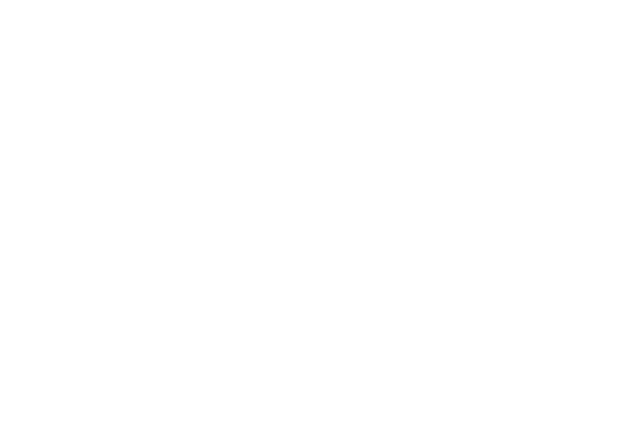

<IPython.core.display.Javascript object>


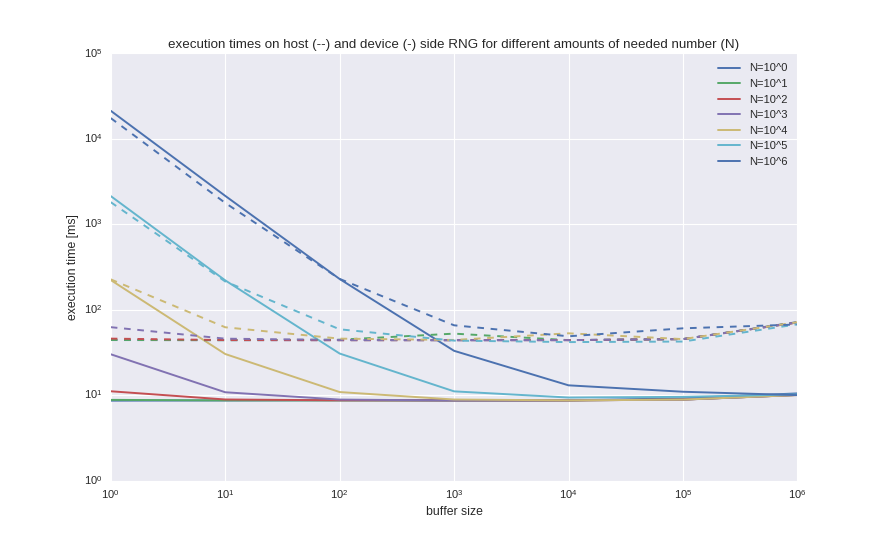

In [32]:
plt.close(plt.gcf())
for i in range(7):
    plt.loglog(N_dev[i,:,1], N_dev[i,:,0], linestyle='-', label='N=10^{}'.format(i))

plt.gca().set_color_cycle(None)

for i in range(7):
    plt.loglog(N_host[i,:,1], N_host[i,:,0], linestyle='--')
    
plt.title('execution times on host (--) and device (-) side RNG for different amounts of needed number (N)')
plt.xlabel('buffer size')
plt.ylabel('execution time [ms]')
plt.legend()

<IPython.core.display.Javascript object>


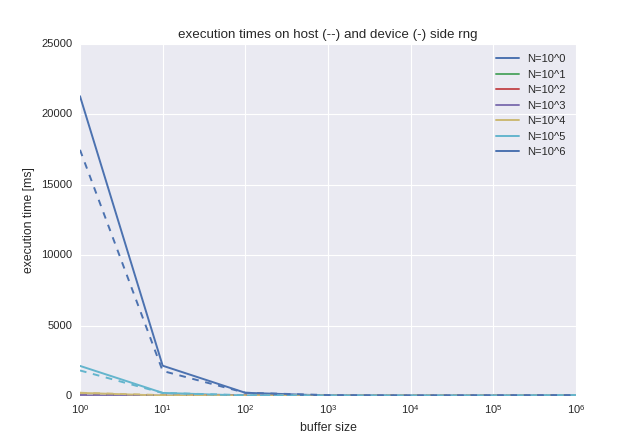

In [30]:
plt.close(plt.gcf())
for i in range(7):
    plt.semilogx(N_dev[i,:,1], N_dev[i,:,0], linestyle='-', label='N=10^{}'.format(i))

plt.gca().set_color_cycle(None)

for i in range(7):
    plt.semilogx(N_host[i,:,1], N_host[i,:,0], linestyle='--')
    
plt.title('execution times on host (--) and device (-) side rng')
plt.xlabel('buffer size')
plt.ylabel('execution time [ms]')
plt.legend()